In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)
result = data.groupby(['MaritalDesc', 'Sex']). agg(min_salary = ('Salary','min'), max_salary = ('Salary','max') ,median_salary= ('Salary','median'), average_salary= ('Salary','mean'))
data_agg = pd.DataFrame(result)
data_agg.head(10)

min_salary  max_salary  median_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069       68182        59393.0    57345.500000
            M         45115      148999        63738.5    72520.857143
Married     F         45433      250000        62662.0    69638.986111
            M         46120      157000        63370.5    70089.038462
Separated   F         52984       66149        60627.0    60658.888889
            M         64397       74417        70468.0    69760.666667
Single      F         45395      220450        62068.0    68988.266667
            M         46428      178000        63055.5    71340.048387
Widowed     F         45046      107226        63303.5    69719.750000
            M         52788       67176        61359.0    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
total_termination = data['TermReason'].value_counts()
data_total_termination = pd.DataFrame({'Total Termination': total_termination})
data_total_termination = pd.DataFrame({'TermReason': total_termination.index, 'total_termination': total_termination.values})
data_total_termination.head(5)

,TermReason,total_termination
0,N/A-StillEmployed,207
1,Another position,20
2,unhappy,14
3,more money,11
4,career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
filtered_data = data[data['PerfScoreID'] > 3]
source_counts = filtered_data['RecruitmentSource'].value_counts().reset_index()
source_counts.columns = ['RecruitmentSource', 'total_recruit']
sorted_source_counts = source_counts.sort_values(by='total_recruit', ascending=False)
sorted_source_counts.head(7)

,RecruitmentSource,total_recruit
0,Indeed,12
1,LinkedIn,9
2,Diversity Job Fair,6
3,Employee Referral,5
4,CareerBuilder,2
5,Google Search,2
6,Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here
manager_count = data.groupby('Department',)['ManagerName'].nunique()
data_manager= pd.DataFrame({'Department': manager_count.index, 'ManagerName': manager_count.values})
data_manager.head(6)

,Department,ManagerName
0,Admin Offices,3
1,Executive Office,1
2,IT/IS,6
3,Production,10
4,Sales,4
5,Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here
termination_ratio = data.groupby('Sex')['Termd'].value_counts(normalize=True)
print(termination_ratio)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64


# Create an EDA and Data Visualization Question

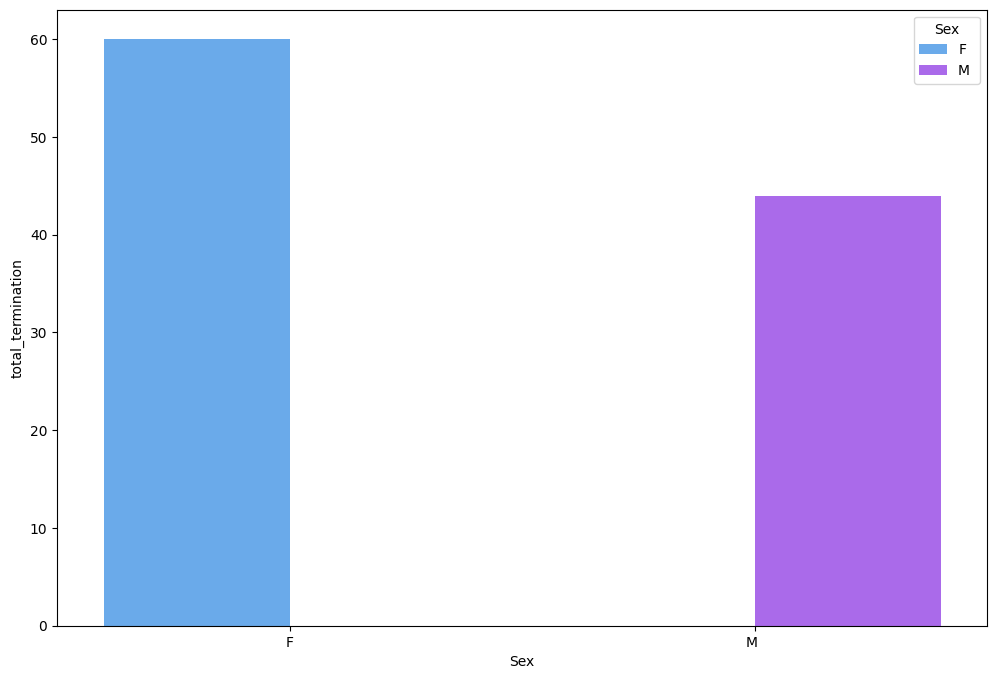

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex']).agg(total_termination=('Termd', 'sum')).reset_index()


#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

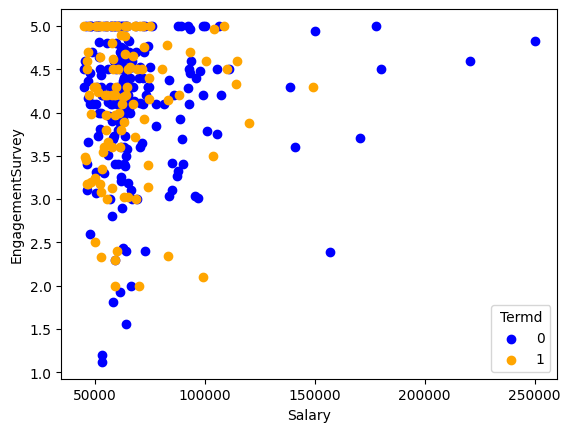

In [ ]:
#code here
plt.scatter(
    data[data['Termd'] == 0]['Salary'],
    data[data['Termd'] == 0]['EngagementSurvey'],
    c='blue',
    label='0',
)

plt.scatter(
    data[data['Termd'] == 1]['Salary'],
    data[data['Termd'] == 1]['EngagementSurvey'],
    c='orange',
    label='1',
)

plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')
plt.legend(title='Termd')
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

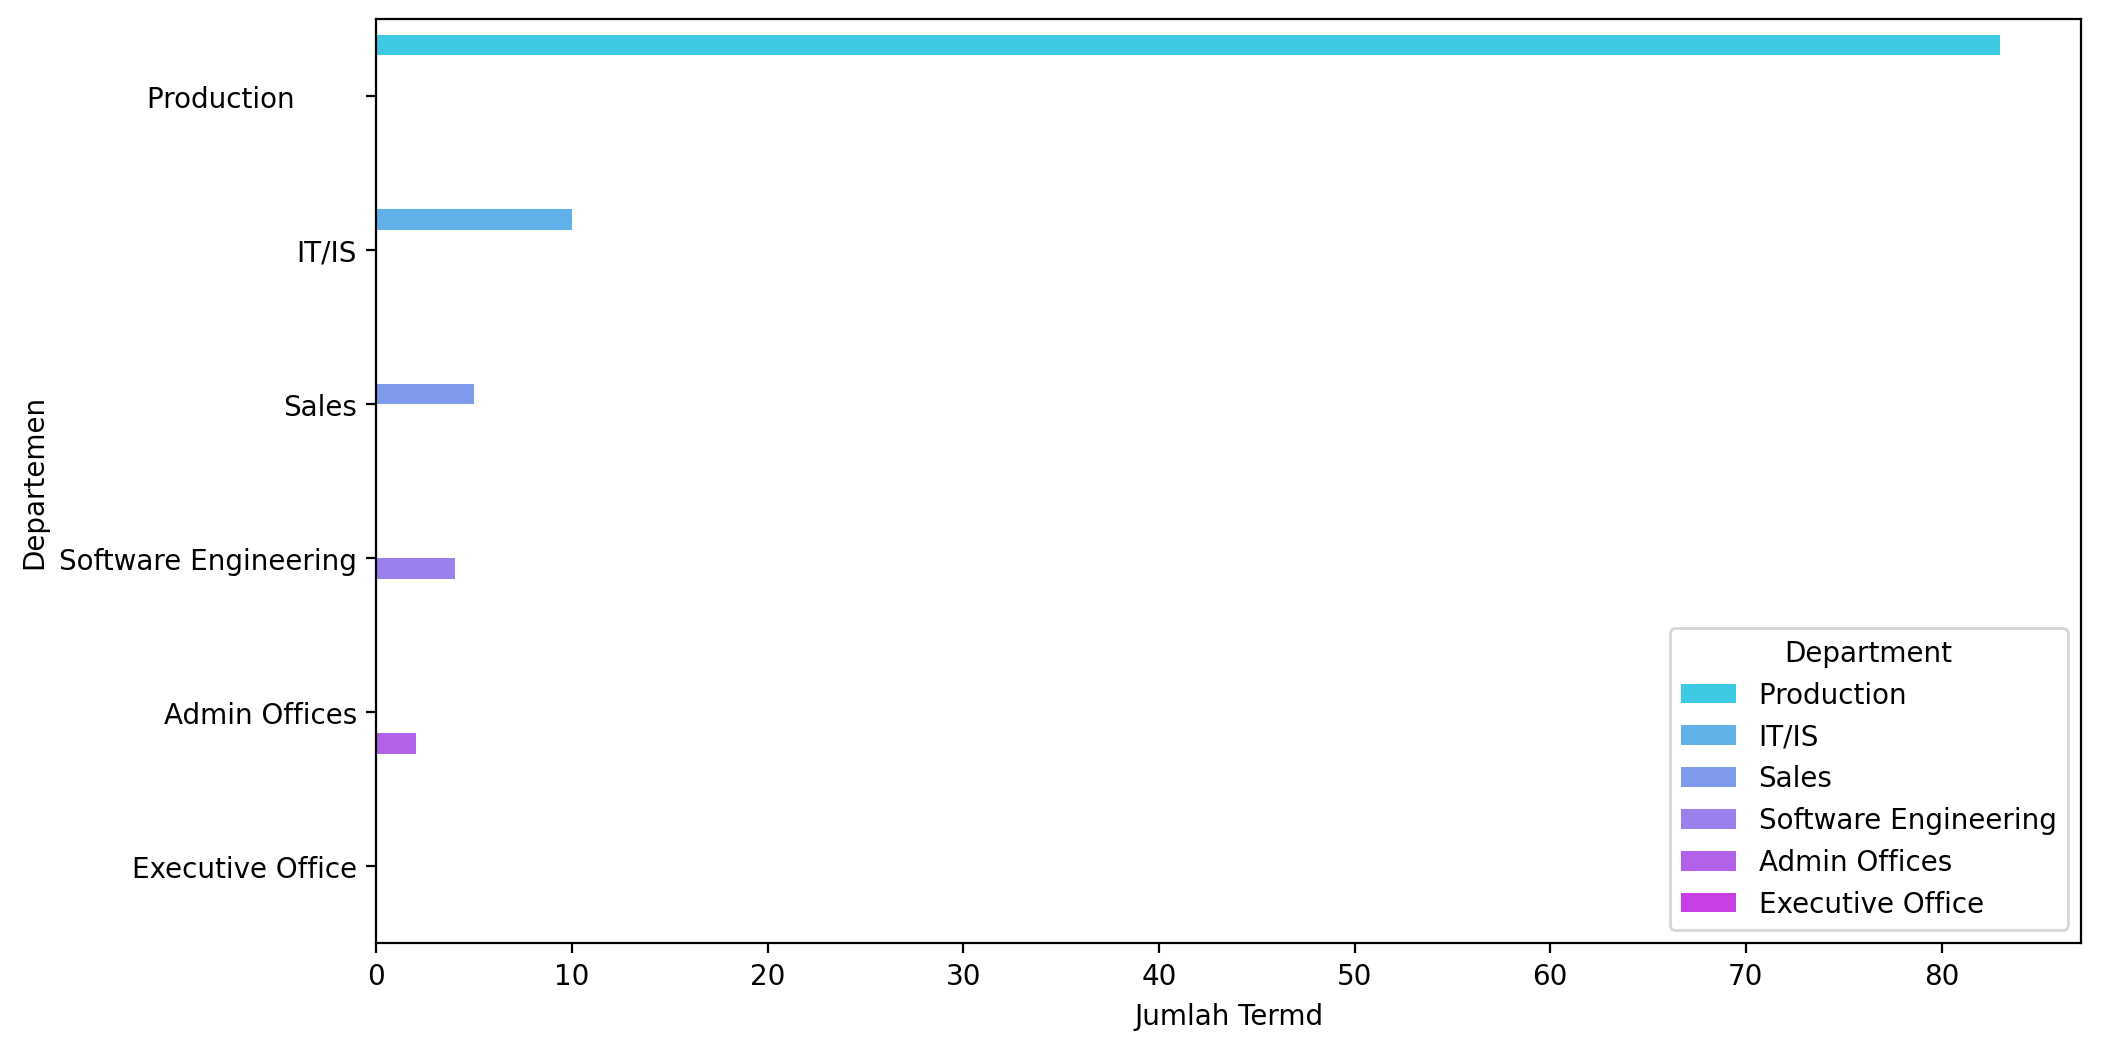

In [ ]:
termd_by_department = data.groupby('Department').agg(total_termination=('Termd','sum')).reset_index()
termd_by_department = termd_by_department.sort_values(by='total_termination', ascending=False)
plt.figure(figsize=(11, 6), dpi = 200)
sns.barplot(data=termd_by_department, x='total_termination', y='Department', hue='Department', palette='cool')

plt.xlabel('Jumlah Termd')
plt.ylabel('Departemen')
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

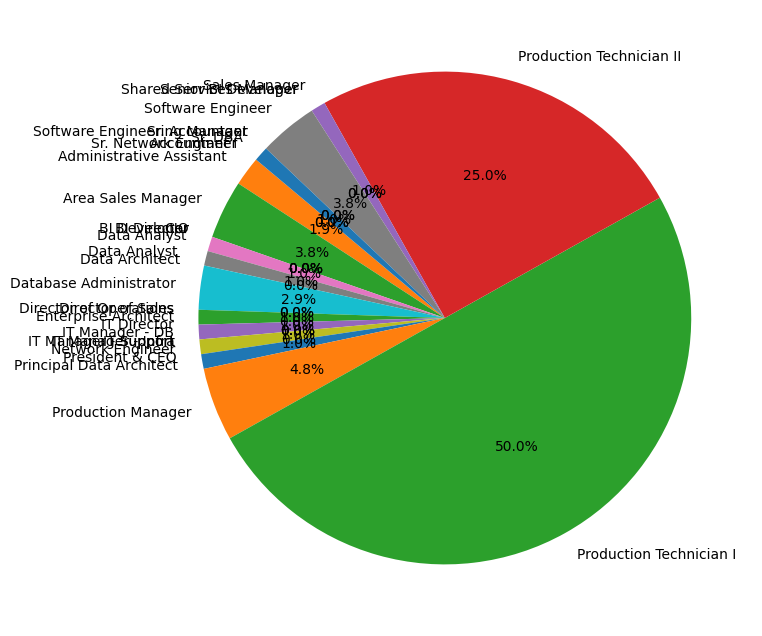

In [ ]:
termd_position = data.groupby('Position')['Termd'].sum()
plt.figure(figsize=(8, 8))
plt.pie(termd_position, labels=termd_position.index, autopct='%1.1f%%', startangle=140)
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

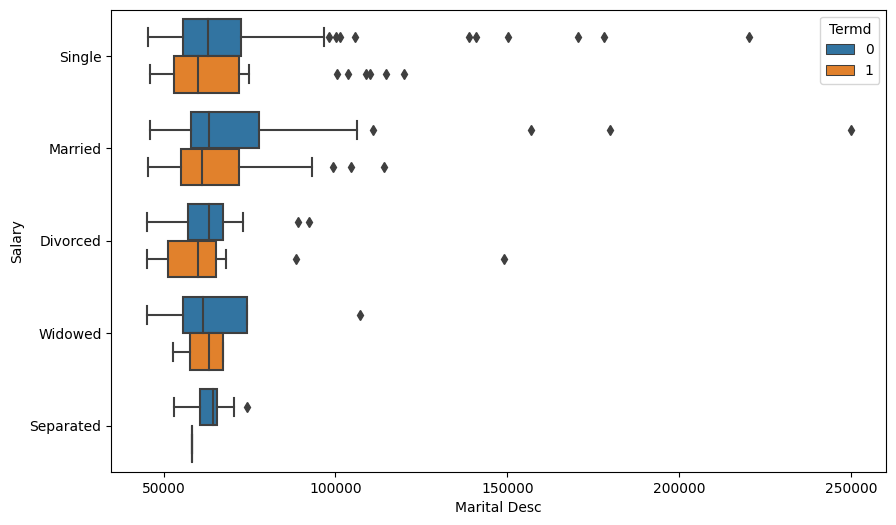

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='Salary', y='MaritalDesc', hue='Termd',orient='horizontal')
plt.xlabel('Marital Desc')
plt.ylabel('Salary')
plt.legend(title='Termd', loc='upper right')
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


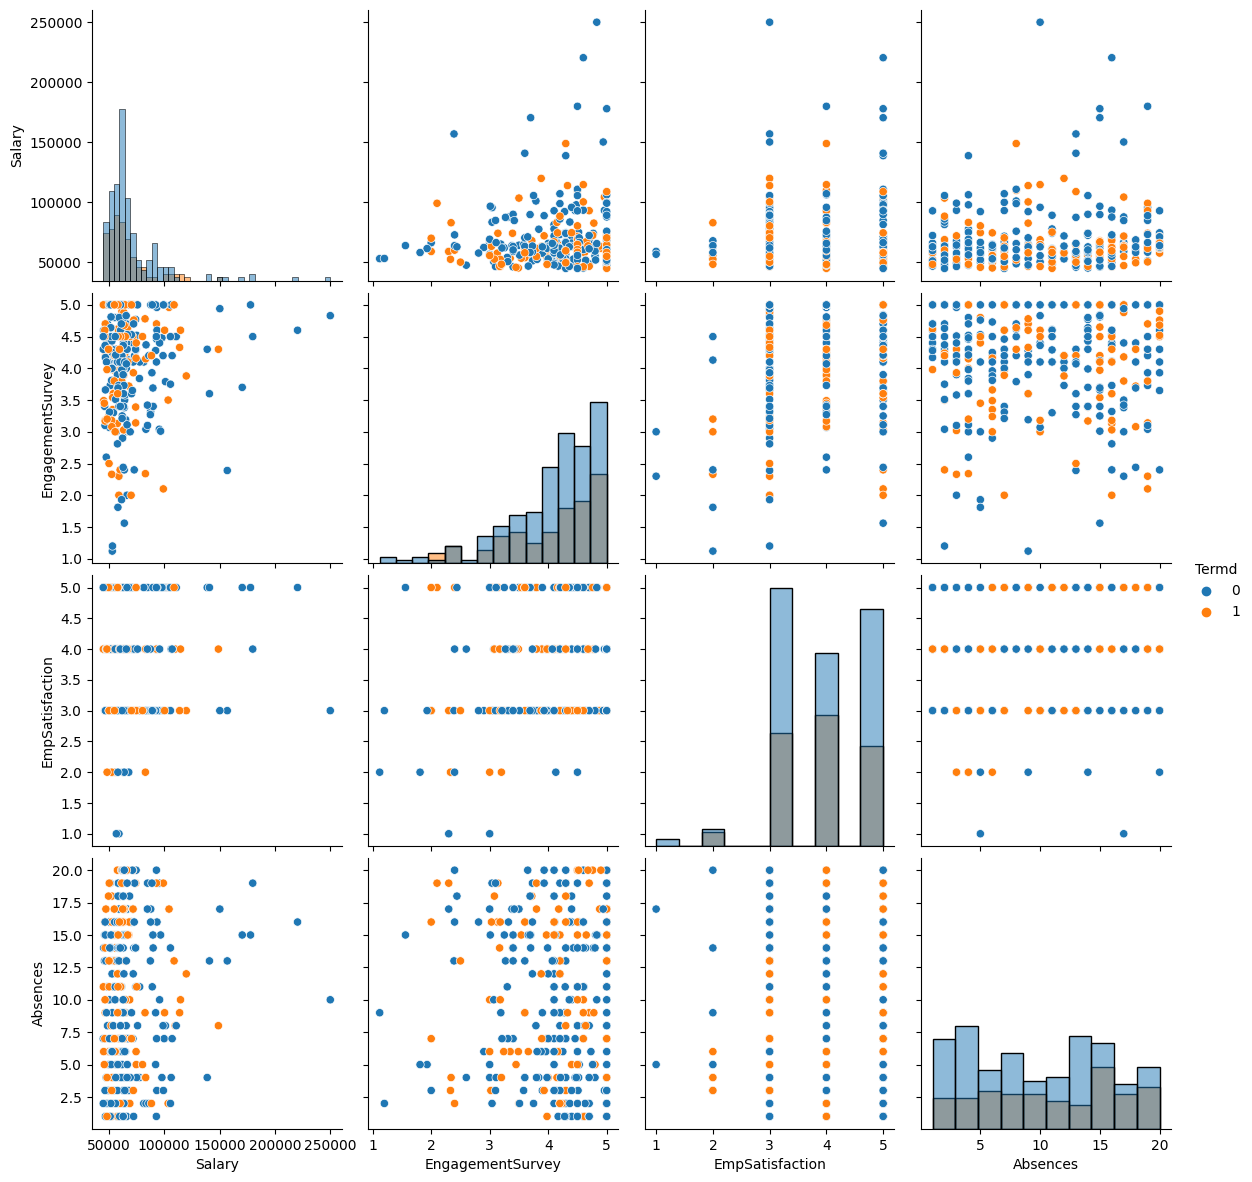

In [ ]:
#codde here
print('Pairplot')
sns.pairplot(data, vars = ['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
data['DOB_date'] = pd.to_datetime(data['DOB'])
data['Age'] = 2022 - data['DOB_date'].dt.year
print(data[['DOB_date', 'Age']])


      DOB_date  Age
0   1983-07-10   39
1   1975-05-05   47
2   1988-09-19   34
3   1988-09-27   34
4   1989-09-08   33
..         ...  ...
306 1985-05-11   37
307 1982-05-04   40
308 1979-08-30   43
309 1979-02-24   43
310 1978-08-17   44

[311 rows x 2 columns]


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Salary_minmax']] = scaler.fit_transform(data[['Salary']])
print(data[['Salary', 'Salary_minmax']])

     Salary  Salary_minmax
0     62506       0.085190
1    104437       0.289777
2     64955       0.097139
3     64991       0.097315
4     50825       0.028197
..      ...            ...
306   65893       0.101716
307   48513       0.016916
308  220450       0.855821
309   89292       0.215883
310   45046       0.000000

[311 rows x 2 columns]


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point
data['Employee_Name'] = data['Employee_Name'].astype("category")
data['Position'] = data['Position'].astype("category")
data['State'] = data['State'].astype("category")
data['DOB'] = data['DOB'].astype("category")
data['Sex'] = data['Sex'].astype("category")
data['MaritalDesc'] = data['MaritalDesc'].astype("category")
data['CitizenDesc'] = data['CitizenDesc'].astype("category")
data['HispanicLatino'] = data['HispanicLatino'].astype("category")
data['RaceDesc'] = data['RaceDesc'].astype("category")
data['DateofHire'] = data['DateofHire'].astype("category")
data['DateofTermination'] = data['DateofTermination'].astype("category")
data['TermReason'] = data['TermReason'].astype("category")
data['EmploymentStatus'] = data['EmploymentStatus'].astype("category")
data['Department'] = data['Department'].astype("category")
data['ManagerName'] = data['ManagerName'].astype("category")
data['RecruitmentSource'] = data['RecruitmentSource'].astype("category")
data['PerformanceScore'] = data['PerformanceScore'].astype("category")
data['LastPerformanceReview_Date'] = data['LastPerformanceReview_Date'].astype("category")

In [ ]:
#Setelah diubah category
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    category      
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [ ]:
from sklearn.preprocessing import LabelEncoder
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point
label_encoder = LabelEncoder()
data['RecruitmentSource'] = label_encoder.fit_transform(data['RecruitmentSource'])

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
data['PerformanceScore'] = label_encoder.fit_transform(data['PerformanceScore'])
print(data[['RecruitmentSource', 'PerformanceScore']])

     RecruitmentSource  PerformanceScore
0                    5                 0
1                    4                 1
2                    5                 1
3                    4                 1
4                    3                 1
..                 ...               ...
306                  5                 1
307                  3                 3
308                  2                 0
309                  2                 1
310                  5                 1

[311 rows x 2 columns]


In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)
y = data['Termd']

#Independent Variable (feature)
x = data.drop(["Termd"], axis=1)


In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  train_size=0.8, random_state=0)

In [ ]:
jumlah_kosong = data.isna().sum()

# Menampilkan hasil
print(jumlah_kosong)

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
data['DateofTermination'] = data['DateofTermination'].cat.add_categories("00-00-00")
data['DateofTermination'].fillna("00-00-00", inplace=True)
data_kosong = data['DateofTermination'].isnull().sum()
print(data_kosong)

0


In [ ]:
data['HispanicLatino'] = label_encoder.fit_transform(data['HispanicLatino'])
data['Employee_Name'] = label_encoder.fit_transform(data['Employee_Name'])
data['Position'] = label_encoder.fit_transform(data['Position'])
data['State'] = label_encoder.fit_transform(data['State'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['MaritalDesc'] = label_encoder.fit_transform(data['MaritalDesc'])
data['CitizenDesc'] = label_encoder.fit_transform(data['CitizenDesc'])
data['RaceDesc'] = label_encoder.fit_transform(data['RaceDesc'])
data['DateofTermination'] = label_encoder.fit_transform(data['DateofTermination'])
data['TermReason'] = label_encoder.fit_transform(data['TermReason'])
data['EmploymentStatus'] = label_encoder.fit_transform(data['EmploymentStatus'])
data['Department'] = label_encoder.fit_transform(data['Department'])
data['ManagerName'] = label_encoder.fit_transform(data['ManagerName'])
data['DOB'] = label_encoder.fit_transform(data['DOB'])
data['DateofHire'] = label_encoder.fit_transform(data['DateofHire'])
data['LastPerformanceReview_Date'] = label_encoder.fit_transform(data['LastPerformanceReview_Date'])
data['DaysLateLast30'] = label_encoder.fit_transform(data['DaysLateLast30'])
data['FromDiversityJobFairID'] = label_encoder.fit_transform(data['FromDiversityJobFairID'])
data['Zip'] = label_encoder.fit_transform(data['Zip'])
data['EmpID'] = label_encoder.fit_transform(data['EmpID'])
data['EmpStatusID'] = label_encoder.fit_transform(data['EmpStatusID'])
data['ManagerID'] = label_encoder.fit_transform(data['ManagerID'])
data['DOB_date'] = label_encoder.fit_transform(data['DOB_date'])
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB_date,Age,Salary_minmax
0,0,25,0,0,1,0,5,4,0,62506,0,19,22,10,39,158,1,3,2,0,5,75,0,3,0,3,17,20,5,0,4.60,5,0,13,0,1,116,39,0.085190
1,1,83,1,1,1,4,3,3,0,104437,1,27,30,10,81,94,1,1,2,0,5,37,56,5,2,2,19,3,4,1,4.96,3,6,65,0,17,23,47,0.289777
2,2,195,1,1,0,4,5,3,0,64955,1,20,23,10,22,224,0,1,2,0,5,75,85,7,2,3,15,18,5,1,3.02,3,0,117,0,3,208,34,0.097139
3,3,87,1,1,0,0,5,3,0,64991,0,19,22,10,31,233,0,1,2,0,5,9,0,3,0,3,8,14,4,1,4.84,5,0,28,0,15,209,34,0.097315
4,4,68,0,2,0,4,5,3,0,50825,1,19,22,10,86,215,0,0,2,0,5,70,95,16,2,3,20,22,3,1,5.00,4,0,43,0,2,222,33,0.028197


In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)

accuracy_percentage = round(accuracy * 100, 2)
print("Accuracy :", accuracy_percentage, "%")

precision_percentage = round(precision_score * 100, 2)
print("Precision :", precision_percentage, "%")

recall_percentage = round(recall_score * 100, 2)
print("Recall :", recall_percentage, "%")

ValueError: ignored

# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
yes
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>
website and on-line web application